# Оглавление
[1. Подготовка данных](#glava_1)  
[2. Анализ данных](#glava_2)  
[3. Модель](#glava_3)  
[Вывод](#conclusion)  

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Данные находятся в трёх файлах:
- gold_recovery_train.csv — обучающая выборка;
- gold_recovery_test.csv — тестовая выборка;
- gold_recovery_full.csv — исходные данные.
Данные индексируются датой и временем получения информации (признак date). 

Опишем каждую стадию получения золота из руды:  

1.***Флотация***  

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).  

2.***Очистка***  

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.



<a id="glava_1"></a>
# 1. Подготовка данных

**1.1. Открем файлы и изучим их.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from IPython.display import display
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')

In [ ]:
test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [ ]:
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [ ]:
train.shape

(16860, 87)

In [ ]:
test.shape

(5856, 53)

In [ ]:
full.shape

(22716, 87)

In [ ]:
train.shape[0]+ test.shape[0]

22716

In [ ]:
train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [ ]:
test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [ ]:
full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

In [ ]:
full.duplicated().sum()

0

**Вывод**  

Даны три таблицы с данными - full, train, test.  
Максимальный размер таблицы с данными - 22716 строк, 87 столбцов.  
Таблица test имеет только 53 столбца.  
В данных присутствуют пропуски.  
Дубликаты отсутствуют.

**1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдем MAE между расчётами и значением признака.**

In [ ]:
#Эффективность обогащения
train['rougher.output.recovery'].head(5)


0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

Эффективность обогащения рассчитывается по формуле

`Recovery = (c * (f - t)) / (f * (c - t)) * 100`  

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.  


Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

In [ ]:
#C доля золота в концентрате после флотации/очистки
c = train['rougher.output.concentrate_au']

In [ ]:
#F — доля золота в сырье/концентрате до флотации/очистки
f = train['rougher.input.feed_au']

In [ ]:
#T — доля золота в отвальных хвостах после флотации/очистки
t = train['rougher.output.tail_au']

In [ ]:
train.loc[:, ['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']]

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
0,19.793808,6.486150,1.170244
1,20.050975,6.478583,1.184827
2,19.737170,6.362222,1.162562
3,19.320810,6.118189,1.079755
4,19.216101,5.663707,1.012642
...,...,...,...
16855,18.603550,5.335862,0.748633
16856,18.441436,4.838619,0.771582
16857,15.111231,4.525061,0.685059
16858,17.834772,4.362781,0.567130


Создадим функцию для расчета `recovery`:

In [ ]:
def recovery(c1, f1, t1):
    rec = (c1*(f1-t1)) / (f1*(c1-t1)) * 100
    return rec

In [ ]:
train['calc_rougher.output.recovery'] = recovery(c,f,t)

Вычислим **mean absolute error (MAE)**:

In [ ]:
def mae(y_true, y_pred):
    mae_calc = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mae_calc

In [ ]:
mae(train['rougher.output.recovery'], train['calc_rougher.output.recovery'])

1.1865277311376902e-14

**Вывод**  

Проверка показала, что эффективности обогащения рассчитана верно, т.к. MAE между расчётами и значением признака мала и равна **1.18e-14**.


**1.3. Проанализируем признаки, недоступные в тестовой выборке. Укажем, что это за параметры и к какому типу относятся.**

Найдем признаки отсутствующие в таблице test:

In [ ]:
columns_test = list(test)
columns_train = list(train)

In [ ]:
for i in columns_train:
    if i not in columns_test:
        x=[]
        x.append(i)
        print(x)

['final.output.concentrate_ag']
['final.output.concentrate_pb']
['final.output.concentrate_sol']
['final.output.concentrate_au']
['final.output.recovery']
['final.output.tail_ag']
['final.output.tail_pb']
['final.output.tail_sol']
['final.output.tail_au']
['primary_cleaner.output.concentrate_ag']
['primary_cleaner.output.concentrate_pb']
['primary_cleaner.output.concentrate_sol']
['primary_cleaner.output.concentrate_au']
['primary_cleaner.output.tail_ag']
['primary_cleaner.output.tail_pb']
['primary_cleaner.output.tail_sol']
['primary_cleaner.output.tail_au']
['rougher.calculation.sulfate_to_au_concentrate']
['rougher.calculation.floatbank10_sulfate_to_au_feed']
['rougher.calculation.floatbank11_sulfate_to_au_feed']
['rougher.calculation.au_pb_ratio']
['rougher.output.concentrate_ag']
['rougher.output.concentrate_pb']
['rougher.output.concentrate_sol']
['rougher.output.concentrate_au']
['rougher.output.recovery']
['rougher.output.tail_ag']
['rougher.output.tail_pb']
['rougher.output.ta

**Вывод**  

В тестовой выборке, как мы видим, отсутствуют расчетные данные для всех стадий обогощения. Т.к. данные расчетные, использование их в модели машинного обучения нет смысла. Поэтому принято решение удалить из таблицы **train** эти признаки.

**1.4. Проведем предобработку данных.**

Заменим пропуски в данных методом `ffill` и удалим расчетные признаки из таблицы **train**:

In [ ]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
full = full.fillna(method='ffill')

In [ ]:
features = test.columns.values
features_train = train[features].reset_index(drop=True)

**Вывод**

Предобработка проведена, удалены столбцы и заполнены пропуски.

<a id="glava_2"></a>
# 2. Анализ данных

**2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.**

Концентрации характеризуются следующими значениями:  
- `rougher.input.feed_...` - сырье поступающее во флотацию;
- `rougher.output.concentrate_...` - сырье после флотации;
- `primary_cleaner.output.concentrate_...` - сырье после первой очистки;
- `final.output.concentrate_...` - сырье после финальной(второй) очистки.

Создадим таблицы для каждого металла с характеристиками концентраций построим гистограммы распределения:

In [ ]:
concentration_au = full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',  'final.output.concentrate_au']]

In [ ]:
concentration_ag = full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag',  'final.output.concentrate_ag']]

In [ ]:
concentration_pb = full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',  'final.output.concentrate_pb']]

In [ ]:
concentration_sol = full[['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol',  'final.output.concentrate_sol']]

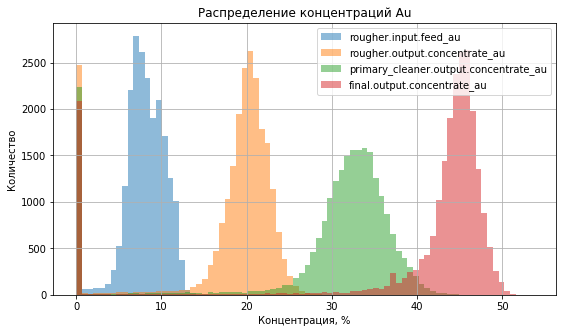

In [ ]:
concentration_au.plot(kind='hist',bins=80, figsize=(9,5), grid=True, alpha=0.5);
plt.ylabel('Количество')
plt.xlabel('Концентрация, %')
plt.title('Распределение концентраций Au')
plt.show()

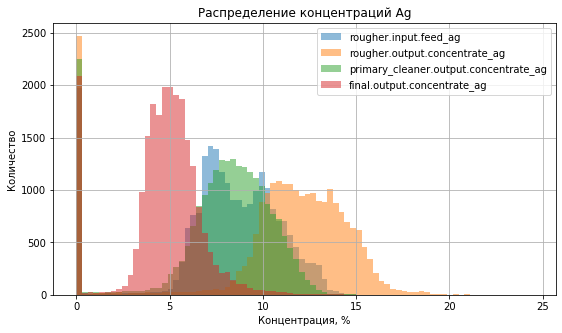

In [ ]:
concentration_ag.plot(kind='hist',bins=80, figsize=(9,5), grid=True, alpha=0.5);
plt.ylabel('Количество')
plt.xlabel('Концентрация, %')
plt.title('Распределение концентраций Ag')
plt.show()

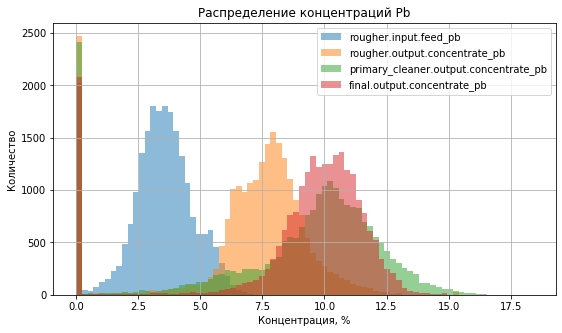

In [ ]:
concentration_pb.plot(kind='hist',bins=80, figsize=(9,5), grid=True, alpha=0.5);
plt.ylabel('Количество')
plt.xlabel('Концентрация, %')
plt.title('Распределение концентраций Pb')
plt.show()

**Вывод**  

Гистограммы распределения показывают:  
1. Концентрация Au (золота) увеличивается после каждого этапа, и достигает максимальных значений после финальной стадии очистки.
2. Концентрация Ag (серебра) максимально на начальном этапе и минимально после финальной стадии.
3. Концентрация Pb (свинца) уменьшается после флотации, на этапах вторичного и финального очищения, практически одинаково.  

Можно сделать вывод, что процесс описан верно и ошибок в данных параметрах нет.


**2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.**

Построим гистограммы распределения гранул сырья для тестовой и обучающей выборке на этапах:
- `rougher.input.feed_size` - начальное сырье;
- `primary_cleaner.input.feed_size` - сырье перед первичной очисткой.

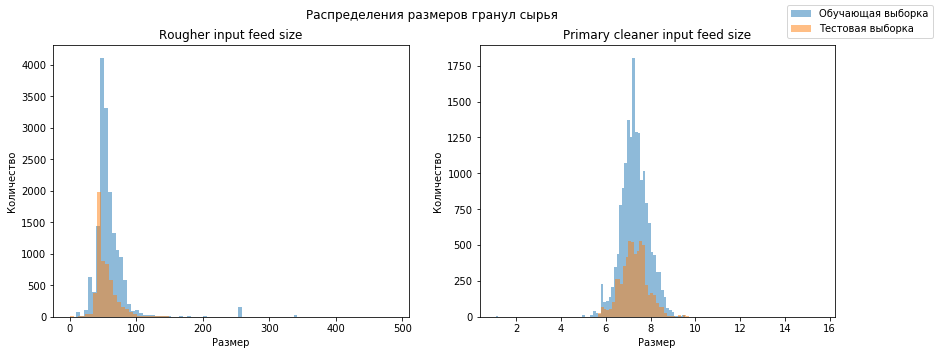

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
axes[0].hist(train['rougher.input.feed_size'], alpha=0.5, bins=80)
axes[0].hist(test['rougher.input.feed_size'], alpha=0.5, bins=80)
axes[0].set(title='Rougher input feed size', xlabel='Размер', ylabel='Количество')
axes[1].hist(train['primary_cleaner.input.feed_size'], alpha=0.5, bins=80)
axes[1].hist(test['primary_cleaner.input.feed_size'], alpha=0.5, bins=80)
axes[1].set(title='Primary cleaner input feed size', xlabel='Размер', ylabel='Количество')
fig.suptitle('Распределения размеров гранул сырья')
fig.legend(['Обучающая выборка', 'Тестовая выборка'], prop={'size': 10}, loc='upper right')
fig.show()

**Вывод**  

Анализ гистограмм показывает что размеры гранул сырья на выборках практически одинаковы, следовательно оценки моделей не будут противоречить друг другу.

**2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

In [ ]:
concentration_au.head()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


Создадим функцию `concentration` для суммирования концентраций всех веществ Au, Ag, Pb, Sol.  

Этапы обогащений:
- `rougher.input.concentration` - начальная концентрация в руде перед флотацией;
- `rougher.output.concentration` - концентрация после флотации;
- `final.output.concentration` - финальная концентрация после всех стадий очистки.

In [ ]:
def concentration(column, *args):
    a =0
    for num in args:
            a += num.iloc[:,column]
    return a

In [ ]:
full['rougher.input.concentration'] = concentration(0, concentration_au, concentration_ag, concentration_pb, concentration_sol)

In [ ]:
full['rougher.output.concentration'] = concentration(1, concentration_au, concentration_ag, concentration_pb, concentration_sol)

In [ ]:
full['final.output.concentration'] = concentration(3, concentration_au, concentration_ag, concentration_pb, concentration_sol)

In [ ]:
concentration_sum = pd.DataFrame()

In [ ]:
concentration_sum = full[['rougher.input.concentration', 'rougher.output.concentration', 'final.output.concentration']]

Построим гистограмму распределения суммарных концентраций:

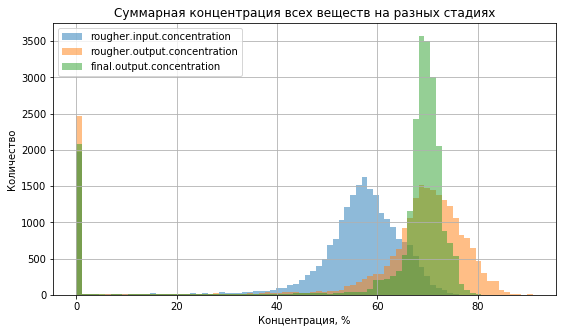

In [ ]:
concentration_sum.plot(kind='hist',bins=80, figsize=(9,5), grid=True, alpha=0.5);
plt.ylabel('Количество')
plt.xlabel('Концентрация, %')
plt.title('Cуммарная концентрация всех веществ на разных стадиях')
plt.show()

На гистограмме видны выбросы, указывающие на концентрации равные и близкие к нулю.  
Необходимо удалить эти значения, т.к. они могут повлиять на качество модели.

Удалим все строки в обучающей и тестовой выборке с суммарными концентрациями менее 20%.

In [ ]:
features_train['rougher.input.concentration'] = concentration(0, concentration_au, concentration_ag, concentration_pb, concentration_sol)

In [ ]:
features_train['rougher.output.concentration'] = concentration(1, concentration_au, concentration_ag, concentration_pb, concentration_sol)

In [ ]:
features_train['final.output.concentration'] = concentration(3, concentration_au, concentration_ag, concentration_pb, concentration_sol)

In [ ]:
test['rougher.input.concentration'] = concentration(0, concentration_au, concentration_ag, concentration_pb, concentration_sol)

In [ ]:
test['rougher.output.concentration'] = concentration(1, concentration_au, concentration_ag, concentration_pb, concentration_sol)

In [ ]:
test['final.output.concentration'] = concentration(3, concentration_au, concentration_ag, concentration_pb, concentration_sol)

In [ ]:
features_train.shape

(16860, 56)

In [ ]:
test.shape

(5856, 56)

In [ ]:
features_train = features_train[(features_train['rougher.input.concentration'] > 20) 
                                & (features_train['rougher.output.concentration'] > 20)
                                & (features_train['final.output.concentration'] > 20)
]

In [ ]:
test = test[(test['rougher.input.concentration'] > 20) 
            & (test['rougher.output.concentration'] > 20)
            & (test['final.output.concentration'] > 20)
]

In [ ]:
features_train.shape

(14845, 56)

In [ ]:
test.shape

(5094, 56)

**Вывод**  

Удалены аномальные значения в тестовой и обучающей выборке для сохранения точности модели машинного обучения.

<a id="glava_3"></a>
# 3. Модель

**3.1. Напишем функции для вычисления итоговой sMAPE.**

![sMAPE](https://wikimedia.org/api/rest_v1/media/math/render/svg/53118848217f8627b7c461eb61ca2070ca716323 "sMAPE")

Итоговая метрика складывается из двух величин:

``sMAPE(final) = sMAPE(rougher) * 25% + sMAPE(final) * 75%``

In [ ]:
def smape (y_target, y_pred):
    smape = 1 / len(y_target) * np.sum(2 * np.abs(y_pred-y_target) / (np.abs(y_target) + np.abs(y_pred))*100)
    return smape
    

In [ ]:
def final_smape (rougher, final):
    total = rougher * 0.25 + final * 0.75
    return total

**3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке.**

Целевыми значениями для наших данных являются следующие признаки:
- эффективность обогащения чернового концентрата `rougher.output.recovery`;
- эффективность обогащения финального концентрата `final.output.recovery`.  

Выделим из обучающей и тестовой выборок целевой признак.

In [ ]:
features_train.shape

(14845, 56)

In [ ]:
test.shape

(5094, 56)

In [ ]:
df_merge = full[['date','rougher.output.recovery', 'final.output.recovery']]

In [ ]:
df_merge.shape

(22716, 3)

In [ ]:
features_train = features_train.merge(df_merge, on='date', how='left')

In [ ]:
target_train = features_train[['rougher.output.recovery', 'final.output.recovery']]

In [ ]:
features_train = features_train.drop(columns=['rougher.output.recovery', 'final.output.recovery'],axis=1)

In [ ]:
test = test.merge(df_merge, on='date', how='left')

In [ ]:
test.shape

(5094, 58)

In [ ]:
features_test = test.drop(columns=['rougher.output.recovery', 'final.output.recovery'],axis=1)

In [ ]:
target_test = test[['rougher.output.recovery', 'final.output.recovery']]

Удалим лишние столбцы (`'date', 'rougher.input.concentration','rougher.output.concentration','final.output.concentration'`) в выборках.

In [ ]:
features_train = features_train.drop(columns=['date','rougher.input.concentration','rougher.output.concentration','final.output.concentration'], axis=1)
features_test = features_test.drop(columns=['date','rougher.input.concentration','rougher.output.concentration','final.output.concentration'], axis=1)

In [ ]:
features_test.shape

(5094, 52)

Стандартизируем данные для изменения диапазонов значений методом **StandardScaler()**:

In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)

In [ ]:
features_test = scaler.fit_transform(features_test)

Проведем обучение для следующих моделей:
1. DecisionTreeRegressor - дерево решений;
2. RandomForestRegressor - случайный лес;
3. LinearRegression - линейная регрессия.  

Найдем подходящие гиперпараметры методом **GridSearchCV** и оценим качество кросс-валидацией.

In [ ]:
state = np.random.RandomState(12345)

**Модель DecisionTreeRegressor** 

In [ ]:
#Создание сетки гиперпараметров
dtr_par = {'max_depth': [50, 100, 150, 200, 250, 300, 350]}

In [ ]:
dtr = DecisionTreeRegressor(random_state=state)
grid = GridSearchCV(dtr, dtr_par)
grid.fit(features_train, target_train)
#best_depth = grid.best_params_['max_depth']
print(grid.best_params_)

{'max_depth': 100}


In [ ]:
best_depth = grid.best_params_['max_depth']

In [ ]:
dtr = DecisionTreeRegressor(max_depth=best_depth, random_state=state)
dtr.fit(features_train, target_train)
final_score = cross_val_score(dtr, features_train, target_train, cv=3).mean()
print(final_score)

-3.221392088015916


**Модель RandomForestRegressor**

In [ ]:
#Создание сетки гиперпараметров
rfr_par = {'n_estimators': [10, 20, 30, 40, 50]}

In [ ]:
rfr = RandomForestRegressor(random_state=state)
grid = GridSearchCV(rfr, rfr_par)
grid.fit(features_train, target_train)
est_best = grid.best_params_['n_estimators']
print(grid.best_params_)

In [ ]:
best_est = grid.best_params_['n_estimators']

In [ ]:
rfr = RandomForestRegressor(n_estimators=best_est, random_state=state)
rfr.fit(features_train, target_train)
final_score = cross_val_score(rfr, features_train, target_train, cv=3).mean()
print(final_score)

**Модель LinearRegression**

In [ ]:
lr = LinearRegression()
lr.fit(features_train, target_train)
final_score = cross_val_score(lr, features_train, target_train, cv=3).mean()
print(final_score)

Наилучший результат показала модель **RandomForestRegressor** c количеством деревьев равным **50**.  

Проверим эту модель на тестовой выборке и вычислим **итоговое значение sMAPE**:

In [ ]:
pred_target = rfr.predict(features_test)

In [ ]:
smape_rougher_recovery = smape(target_test.iloc[:,0], pred_target[:,0])

In [ ]:
smape_rougher_recovery

12.900189105502598

In [ ]:
smape_final_recovery = smape(target_test.iloc[:,1], pred_target[:,1])

In [ ]:
smape_final_recovery

13.555977921216092

In [ ]:
total_smape = final_smape(smape_rougher_recovery, smape_final_recovery)

In [ ]:
print('Итоговое sMAPE для RandomForestRegressor:', total_smape)

Итоговое sMAPE для RandomForestRegressor: 13.392030717287719


Сравненим полученное моделью значение итогового sMAPE на тестовой выборке с константной моделью, где значения целевых признаков заполнены средними значениями:

In [ ]:
constant_model_mean = target_train.mean()
constant_model_mean

rougher.output.recovery    81.416105
final.output.recovery      67.054695
dtype: float64

In [ ]:
data = {'rougher.output.recovery' : [constant_model_mean[0]],
        'final.output.recovery' : [constant_model_mean[1]]
}

In [ ]:
constant_model_test = pd.DataFrame(data, index=range(len(target_test)))

In [ ]:
constant_model_test.head()

,rougher.output.recovery,final.output.recovery
0,81.416105,67.054695
1,81.416105,67.054695
2,81.416105,67.054695
3,81.416105,67.054695
4,81.416105,67.054695


In [ ]:
smape_rougher_constant = smape(target_test.iloc[:,0], constant_model_test.iloc[:,0])

In [ ]:
smape_final_constant = smape(target_test.iloc[:,1], constant_model_test.iloc[:,1])

In [ ]:
total_smape1 = final_smape(smape_rougher_constant, smape_final_constant)
print('Итоговое sMAPE константной модели:', total_smape1)

Итоговое sMAPE константной модели: 12.583220389180678


<a id="conclusion"></a>
# Вывод

Данные находятся в трёх файлах: full, train, test.
Максимальный размер таблицы с данными - 22716 строк, 87 столбцов.
Таблица test имеет только 53 столбца.
В данных присутствуют пропуски.
Дубликаты отсутствуют.  

Гистограммы распределения концентраций металлов показывают, что процесс обогащения описан верно и ошибок в данных параметрах нет.  

Анализ гистограмм распределения размеров гранул сырья показывает, что размеры на обучающей и тестовой выборках практически одинаковы. Таким образом, оценки моделей не будут противоречить друг другу.  

На гистограмме суммарных концентраций присутствуют выбросы. Удалены все строки в обучающей и тестовой выборке с суммарными концентрациями менее 20%.  

Целевыми значениями для наших данных являются следующие признаки:

- эффективность обогащения чернового концентрата `rougher.output.recovery`;
- эффективность обогащения финального концентрата `final.output.recovery`.

Проведено обучение для следующих моделей:

1. **DecisionTreeRegressor** - дерево решений;
2. **RandomForestRegressor** - случайный лес;
3. **LinearRegression** - линейная регрессия.  

Наилучший результат показала модель **RandomForestRegressor** c количеством деревьев равным **50**.  

**Итоговое sMAPE для RandomForestRegressor: 13.39 %**  
**Итоговое sMAPE константной модели: 12.58 %**

Константная модель показала практически такой же результат, как и найденная лучшая модель машинного обучения.  

**Рекомендации:**
- провести аудит всех признаков для выявления аномалий;
- выявить дополнительные признаки;
- поиск новых метрик  для оценки обогащения;
- использовать другие модели.




